## TECHIN 513 - Basic ML

**Instructions**

Install the required packages (scikit-learn, TensorFlow, Keras, PyTorch, and, pandas) if they are not already installed.

In [1]:
# use pip to install the packages
# !pip install scikit-learn TensorFlow Keras PyTorch pandas numpy

# Import necessary packages
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt

2023-02-19 14:35:19.050529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Task 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Task 2: Split the data into training and testing sets
# use train_test_split function to split the data with test_size = 0.2 and random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [4]:
# Task 3: Train a Random Forest Classifier on the training data
# import RandomForestClassifier from sklearn and fit it with training data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
# Task 4: Evaluate the classifier on the testing data
# use clf.score function to evaluate the classifier on the testing data
# print the accuracy of the classifier
score = clf.score(X_test, y_test)
print(score)

1.0


In [6]:

# Task 5: Load the MNIST dataset
# use keras.datasets.mnist.load_data() to load the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape: ", test_images.shape)
print("Test labels shape: ", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape:  (10000, 28, 28)
Test labels shape:  (10000,)


In [7]:
# Task 6: Preprocess the data
# normalize the data by dividing by 255.0
# use to_categorical from keras.utils to one-hot encode the labels
labels_train = keras.utils.to_categorical(train_labels, 10)
labels_test = keras.utils.to_categorical(test_labels, 10)
print(labels_train.shape)
print(labels_test.shape)
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape[1:4])
print(test_images.shape[1:4])

(60000, 10)
(10000, 10)
(28, 28, 1)
(28, 28, 1)


In [8]:
# Task 7: Define and train a simple neural network using Keras
# use Sequential model from keras.models
# use Dense layer from keras.layers
# use 'adam' as optimizer and 'categorical_crossentropy' as loss function
# use model.fit to train the model
model = keras.models.Sequential()
input_shapes = [(28, 28, 1), 32, 64, 10]
model.add(keras.Input(shape=input_shapes[0]))
model.add(keras.layers.Conv2D(input_shapes[1], kernel_size=(3,3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"))
model.add(keras.layers.Conv2D(input_shapes[2], kernel_size=(3,3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), padding="same",))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(input_shapes[3], activation='softmax'))
model.compile(
    optimizer = "adam",
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
print(model.summary())
model.fit(train_images, labels_train, batch_size=128, epochs=15, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0

2023-02-19 14:35:35.048355: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None
Epoch 1/15
422/422 [==============================] - 14s 32ms/step - loss: 0.3380 - accuracy: 0.8989 - val_loss: 0.0811 - val_accuracy: 0.9790
Epoch 2/15
422/422 [==============================] - 15s 36ms/step - loss: 0.1058 - accuracy: 0.9670 - val_loss: 0.0596 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0775 - accuracy: 0.9760 - val_loss: 0.0472 - val_accuracy: 0.9878
Epoch 4/15
422/422 [==============================] - 17s 39ms/step - loss: 0.0660 - accuracy: 0.9798 - val_loss: 0.0417 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 18s 41ms/step - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0.0407 - val_accuracy: 0.9885
Epoch 6/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0528 - accuracy: 0.9830 - val_loss: 0.0359 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 17s 40ms/step - loss: 0.0493 - accuracy: 0.9841 - val_loss: 0.0338 - val_accu

In [9]:
# Task 8: Evaluate the neural network on the testing data
# use model.evaluate to get the test loss and test accuracy
scores = model.evaluate(test_images, labels_test)
print("Accuracy: %d%%" % (scores[1]*100))

313/313 [==============================] - 3s 10ms/step - loss: 0.0251 - accuracy: 0.9920
Accuracy: 99%


In [80]:
# Task 9: Define a simple linear regression model using PyTorch
# create a class LinearRegression that inherit from nn.Module
# define the constructor and forward function
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        y = self.linear(x)
        # self.activation = nn.ReLU()
        return y

epoch 0, loss 11880.728515625, datasize 1575
epoch 1, loss 11795.544921875, datasize 1575
epoch 2, loss 11938.8935546875, datasize 1575
epoch 3, loss 11715.177734375, datasize 1575
epoch 4, loss 11996.97265625, datasize 1575
epoch 5, loss 11635.3408203125, datasize 1575
epoch 6, loss 12055.509765625, datasize 1575
epoch 7, loss 11556.201171875, datasize 1575
epoch 8, loss 12114.2412109375, datasize 1575
epoch 9, loss 11477.12890625, datasize 1575
epoch 10, loss 12172.4111328125, datasize 1575
epoch 11, loss 11397.6015625, datasize 1575
epoch 12, loss 12229.9296875, datasize 1575
epoch 13, loss 11317.9638671875, datasize 1575
epoch 14, loss 12287.451171875, datasize 1575
epoch 15, loss 11238.9287109375, datasize 1575
epoch 16, loss 12345.4306640625, datasize 1575
epoch 17, loss 11160.552734375, datasize 1575
epoch 18, loss 12403.494140625, datasize 1575
epoch 19, loss 11082.1708984375, datasize 1575
epoch 20, loss 12460.9375, datasize 1575
epoch 21, loss 11003.32421875, datasize 1575
ep

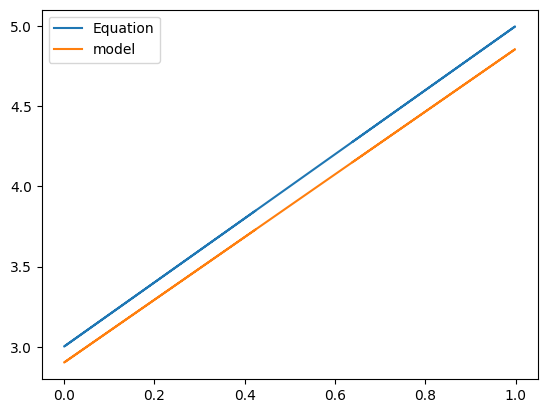

In [86]:
# Task 10: Train the linear regression model on some dummy data and print the weight and bias
# create an instance of LinearRegression
# use nn.MSELoss as criterion, optim.SGD as optimizer
# use model.parameters() as input for optimizer
# use optimizer.step() and criterion to update the model weight and bias

# random data
def generate_data(data_size):
    x = torch.Tensor([[random.random()] for _ in range(data_size)])
    # x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
    return x

def linear_equation(x):
    return torch.add(torch.mul(x, 2), 3) # y = 2*x + 3

epochs = 10000
data_size = random.randint(100, 2000)
datax = generate_data(data_size)
datay = linear_equation(datax)
x_data = Variable(datax)
y_data = Variable(datay)

linear = LinearRegression(1, 1)
criterion = nn.MSELoss(size_average=False)
optimizer = optim.SGD(linear.parameters(), lr=0.0005, weight_decay=0.9)


for epoch in range(epochs):
    pred_y = linear(x_data)
    loss = criterion(pred_y, y_data)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}, datasize {}'.format(epoch, loss.item(), len(x_data)))

# testx = generate_data(10)
# testy = linear_equation(testx)
# x_test = Variable(testx)
# y_test = Variable(testy)
pred_y = linear(x_data)

plt.plot(datax, datay, label="Equation")
plt.plot(datax, pred_y.detach().numpy(), label="model")
plt.legend()
plt.show()

# Bonus

In [82]:
# Bonus Task: Implement a Convolutional Neural Network to classify the CIFAR-10 dataset
# use torchvision.datasets.CIFAR10 to load the dataset
# create a class CNN that inherit from nn.Module
# define the constructor, forward function and the network architecture 
# use CrossEntropyLoss as criterion, optim.SGD as optimizer
# use model.parameters() as input for optimizer
# use optimizer.step() and criterion to update the model weight and bias